In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
tmp = np.load('selected_features.npy', allow_pickle=True)
for i in tmp:
    print(i)

Total Food Expenditure
Agricultural Household indicator
Bread and Cereals Expenditure
Meat Expenditure
Total Fish and  marine products Expenditure
Fruit Expenditure
Vegetables Expenditure
Restaurant and hotels Expenditure
Alcoholic Beverages Expenditure
Tobacco Expenditure
Clothing, Footwear and Other Wear Expenditure
Housing and water Expenditure
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Education Expenditure
Miscellaneous Goods and Services Expenditure
Special Occasions Expenditure
Crop Farming and Gardening expenses
Total Income from Entrepreneurial Acitivites
Household Head Age
Total Number of Family members
Members with age 5 - 17 years old
Total number of family members employed
House Floor Area
House Age
Number of bedrooms
Electricity
Number of Television
Number of CD/VCD/DVD
Number of Component/Stereo set
Number of Refrigerator/Freezer
Number of Washing Machine
Number of Airconditioner
Number of Car, Jeep, Van
Number of Landline/wireless tele

Text(0.5, 1.0, 'Test data')

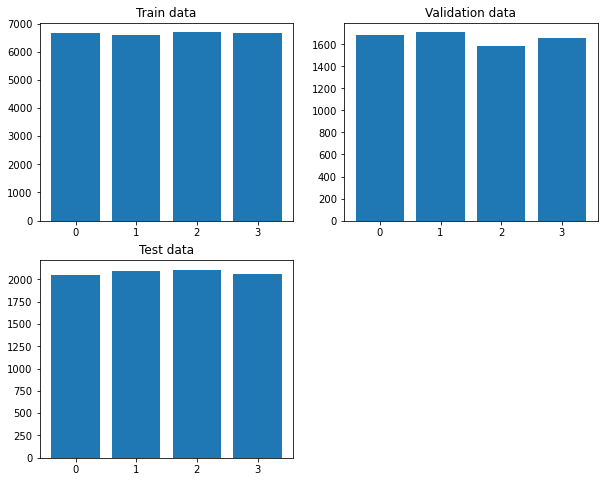

In [20]:
train = pd.read_csv('data/train.csv')
validation = pd.read_csv('data/validation.csv')
test = pd.read_csv('data/test.csv')
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.bar(range(4), train['target'].value_counts(sort=False, ascending=True))
plt.title('Train data')
plt.subplot(2, 2, 2)
plt.bar(range(4), validation['target'].value_counts(sort=False, ascending=True))
plt.title('Validation data')
plt.subplot(2, 2, 3)
plt.bar(range(4), test['target'].value_counts(sort=False, ascending=True))
plt.title('Test data')

In [7]:
dataset = pd.read_csv('dataset.csv')
processed_dataset = pd.read_csv('processed_dataset.csv')
num_features = np.load('numeric_features.npy')
dataset.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


## Data distribution

<AxesSubplot:title={'center':'Numeric data distribution'}, xlabel='Total Household Income', ylabel='Count'>

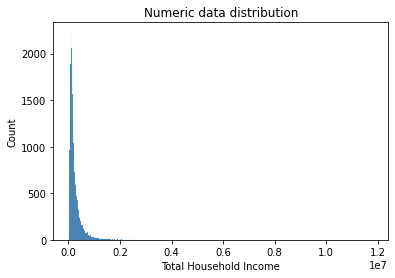

In [39]:
plt.title('Numeric data distribution')
sns.histplot(x='Total Household Income', data=dataset)

<AxesSubplot:xlabel='target', ylabel='count'>

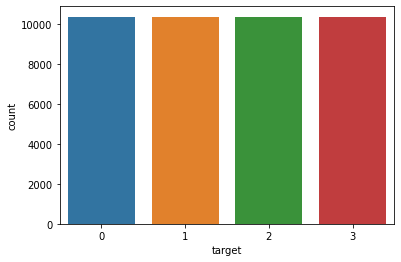

In [40]:
sns.countplot(x='target', data=processed_dataset)

## Features

<AxesSubplot:>

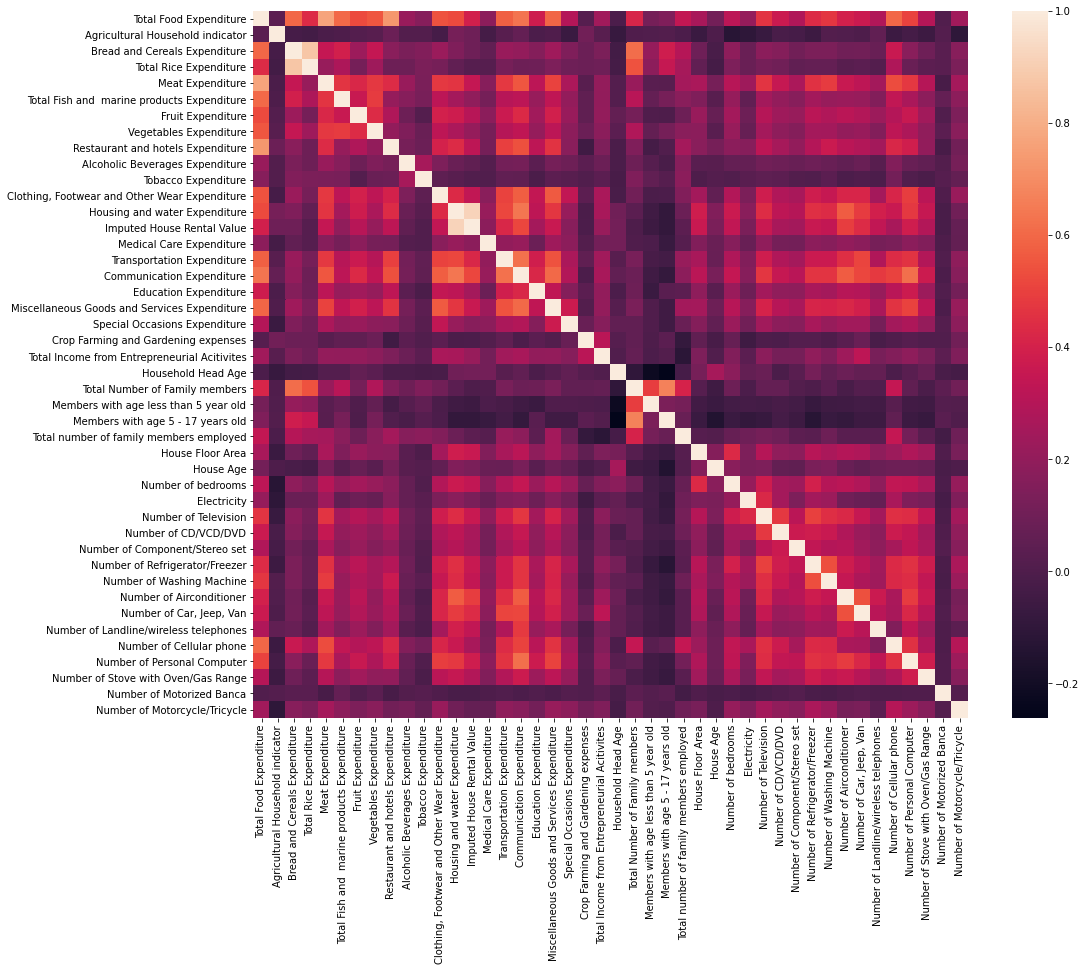

In [46]:
plt.figure(figsize=(16, 13))
sns.heatmap(processed_dataset[num_features].corr())

In [92]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
tmp = SelectKBest(mutual_info_classif, k=26)

In [93]:
tmp.fit(train[num_features], train['target'])

SelectKBest(k=26,
            score_func=<function mutual_info_classif at 0x00000200D175D168>)

In [94]:
selected_features = tmp.get_support()

In [95]:
selected_features = num_features[selected_features]

In [16]:
train = pd.read_csv('data/train.csv')
validation = pd.read_csv('data/validation.csv')
test = pd.read_csv('data/test.csv')
etrain = pd.read_csv('data/etrain.csv')
evalidation = pd.read_csv('data/evalidation.csv')
etest = pd.read_csv('data/etest.csv')

In [96]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1',random_state=20, max_iter=1000, multi_class='multinomial', solver='saga', n_jobs=4)
clf.fit(train[selected_features], train['target'])

C:\Users\ychhu\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=4,
                   penalty='l1', random_state=20, solver='saga')

In [97]:
clf.score(validation[selected_features], validation['target'])

0.7446968557243869

In [90]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
clf = LogisticRegression(penalty='l1',random_state=20, max_iter=5000, multi_class='multinomial', solver='saga', n_jobs=4)
min_features_to_select = 3  # Minimum number of features to consider
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(train[num_features], train['target'])

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=5000, multi_class='multinomial',
                                   n_jobs=4, penalty='l1', random_state=20,
                                   solver='saga'),
      min_features_to_select=3, scoring='accuracy')

Optimal number of features : 26


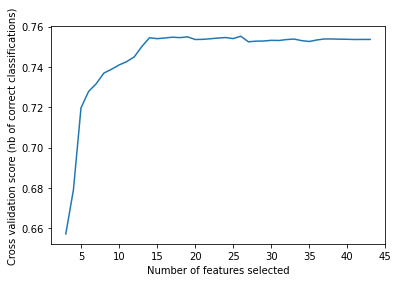

In [91]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [100]:
np.save('optimal_pred', rfecv.ranking_)

In [22]:
tmp = np.load('optimal_pred.npy')

In [23]:
tmp

array([ 1, 10,  1,  1,  1,  8, 18,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 13, 14,  5,  1,  1, 15,  3,  1,  9, 16,  1,
        6,  1,  7, 17,  1,  1, 12, 11,  4])

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
DC = DecisionTreeClassifier(criterion='entropy')
DC.fit(train[num_features], train['target'])
DC.feature_importances_

array([2.75400514e-01, 3.28822113e-03, 1.01147979e-02, 1.20732915e-02,
       2.10687058e-02, 1.51483315e-02, 1.61329724e-02, 1.51626641e-02,
       1.28765437e-02, 1.00342536e-02, 1.18387824e-02, 2.51846785e-02,
       1.41312682e-01, 9.96000344e-03, 2.30626198e-02, 3.31352410e-02,
       3.03980822e-02, 1.74919126e-02, 1.24895184e-01, 2.41300936e-02,
       5.57030478e-03, 5.70355058e-02, 1.70713267e-02, 7.72027430e-03,
       1.53205060e-03, 4.96110927e-03, 1.55657176e-02, 1.62263008e-02,
       1.31385486e-02, 5.52421796e-03, 2.77671464e-03, 1.56731614e-03,
       2.29878383e-03, 3.21023927e-03, 1.66568890e-03, 6.55701532e-04,
       5.68640965e-04, 1.49212480e-04, 5.45788453e-03, 1.53684334e-03,
       7.04376206e-04, 3.21221578e-04, 2.03244418e-03])

In [46]:
DC.score(test[num_features], test['target'])

0.6561559754483091

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
DC = DecisionTreeClassifier(criterion='entropy')
min_features_to_select = 3  # Minimum number of features to consider
rfecv = RFECV(estimator=DC, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=1,
              min_features_to_select=min_features_to_select, n_jobs=4)
rfecv.fit(train[num_features], train['target'])
#rfecv.fit(etrain.drop('target', axis=1), etrain['target'])

Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(criterion='entropy'),
      min_features_to_select=3, n_jobs=4, scoring='accuracy', verbose=1)

Optimal number of features : 33


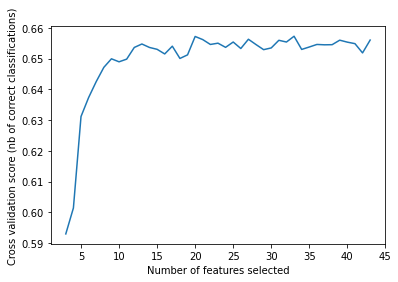

In [48]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

Optimal number of features : 23


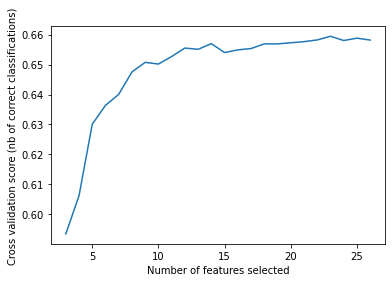

In [44]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [2]:
dataset = pd.read_csv('processed_dataset.csv')

In [8]:
dataset.columns

Index(['Total Food Expenditure', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       ...
       'Main Source of Water Supply_Lake, river, rain and others',
       'Main Source of Water Supply_Others',
       'Main Source of Water Supply_Own use, faucet, community water system',
       'Main Source of Water Supply_Own use, tubed/piped deep well',
       'Main Source of Water Supply_Peddler',
       'Main Source of Water Supply_Protected spring, river, stream, etc',
       'Main Source of Water Supply_Shared, faucet, community water system',
       'Main Source of Water Supply_Shared, tubed/piped deep well',
       'Main Source of Water Supply_Tubed/piped shallow well',
       'Main Source of Water Supply_Unprotected spring, riv

In [7]:
from minisom import MiniSom

In [27]:
data = dataset[['Miscellaneous Goods and Services Expenditure', 'Communication Expenditure', 'Total Food Expenditure']].values
som = MiniSom(5, 5, 3, sigma=1, learning_rate=1.2, 
              neighborhood_function='gaussian', random_seed=10)
som.train_random(data, 500, verbose=True)


 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.020477846147239857


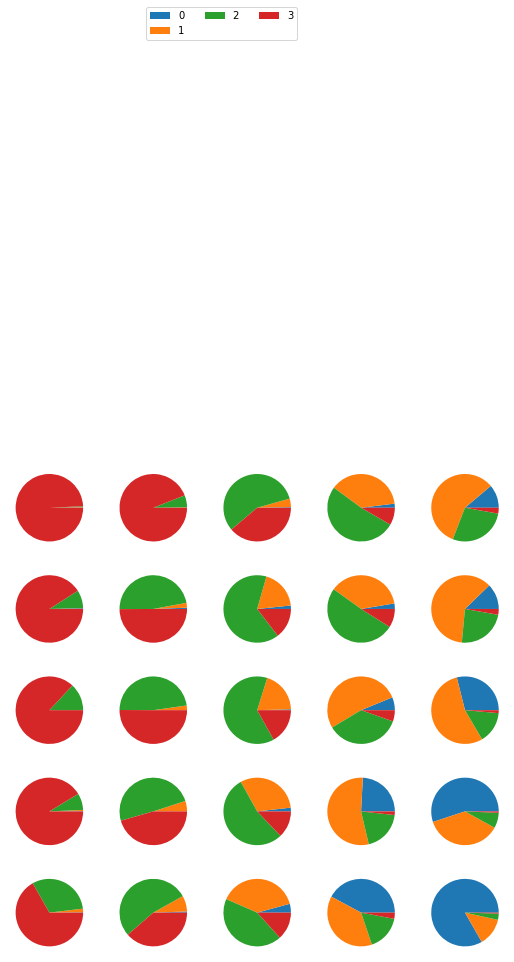

In [28]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(data, dataset['target'])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(5, 5, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in range(4)]
    plt.subplot(the_grid[5-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, range(4), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()

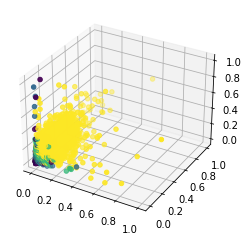

In [6]:
plt.figure()
ax = plt.subplot(1,1,1, projection='3d')
ax.scatter(dataset['Miscellaneous Goods and Services Expenditure'],
           dataset['Communication Expenditure'],
           dataset['Total Food Expenditure'], c=dataset['target'])
 
plt.show()

<AxesSubplot:xlabel='Total Rice Expenditure', ylabel='Bread and Cereals Expenditure'>

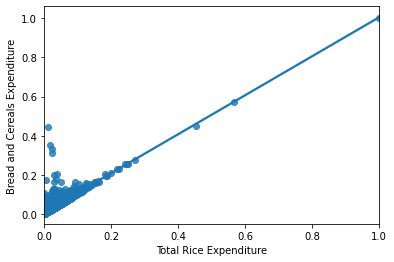

In [29]:
plt.figure()
sns.regplot(x=dataset['Total Rice Expenditure'], y=dataset['Bread and Cereals Expenditure'])

<AxesSubplot:xlabel='Imputed House Rental Value', ylabel='Housing and water Expenditure'>

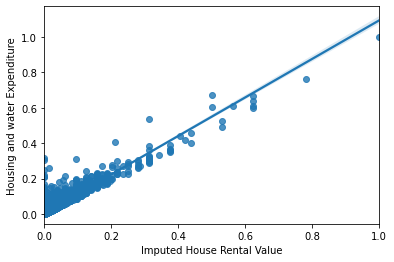

In [30]:
plt.figure()
sns.regplot(x=dataset['Imputed House Rental Value'], y=dataset['Housing and water Expenditure'])